
本人主要方向是深度学习技术在媒体、教育上的应用，欢迎深度学习赛道上的新老司机们关注交流。以后还会为大家分享更多有趣的项目。

【下面是我的主页链接】

来AI Studio互粉吧~等你哦~ [https://aistudio.baidu.com/aistudio/personalcenter/thirdview/76563](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/76563)

【项目列表】

[一文帮你理解用Paddle训练模型的原理1-手写回归模型 (https://aistudio.baidu.com/aistudio/projectdetail/367090)](https://aistudio.baidu.com/aistudio/projectdetail/367090)

[一文帮你理解用Paddle训练模型的原理2-权值可视化（VisualDL） (https://aistudio.baidu.com/aistudio/projectdetail/386954)](https://aistudio.baidu.com/aistudio/projectdetail/386954)

[训练数据太少？过拟合？一文带你领略“数据增长魔法”(上) (https://aistudio.baidu.com/aistudio/projectdetail/408059)](https://aistudio.baidu.com/aistudio/projectdetail/408059)

[训练数据太少？过拟合？一文带你领略“数据增长魔法”(下) (https://aistudio.baidu.com/aistudio/projectdetail/422256)](https://aistudio.baidu.com/aistudio/projectdetail/422256)



# 一 引言：
不好意思，“一文搞懂”已经写到第三篇（上、下、续）了。主要是我太中意PM给这项目起的名字了（原来的名字好像是叫《一文给涨点儿》之类的），舍不得就又在这个项目用了一次。

前两个项目已经将现有的主要图片数据增广技术介绍的差不多了（除了GAN妖法以外，这个下次再炼），包括单张图片的拉伸、旋转、翻转、裁切、填充、遮挡、变色、变对比度、加噪声等，和两张图片的融合处理，较好的控制了过拟合，提升了模型效果。

这次要解决的问题是——**训练数据分布不平衡**。举个例子，在猫狗识别任务中，用分类模型识别图片是猫还是狗时，训练数据里“猫多狗少”，导致模型对狗的特征学得不够好，分类精度低。




# 二 SMOTE简介
**解决分布问题的方法大概以下几招：**

1.**给loss加权**。还用刚才的例子，训练集里猫图有1000张，狗图100张，训练时给标注为狗的图片的loss乘以10，不然在每个batch中狗图太少，其特征对模型权重的影响太小。

2.**欠采样**。把多的900张猫图删掉，猫图狗图各100张，这样就平衡了。

3.**过采样**。把每张狗图复制9份，100张变1000张，这样猫图狗图都是1000张也平衡了。

以上，方法2弃用部分数据，会导致模型欠拟合，与我们项目“数据增长”的宗旨背道而驰，太败家子儿了，不可取。当然个别富人、富项目也是可以用方法2“偷懒”的。对于方法1和3，我觉得本质上是一回事儿，无论是方法1的“把一张饼当N张吃”，还是方法3的“把同一张饼吃N遍”，都属于画饼充饥式的“我欺骗我的胃”。模型还是没有在这少得可怜的狗样本中学到足够的狗特征，会导致过拟合，也都不可取。

要想让数据“大变活人”，还得放大招：**基于在样本空间插值的过采样方法**

SMOTE——Synthetic Minority Over-sampling Technique：

smote方法也是对数据偏少的类别进行过采样，但不是简单复制，而是在样本空间基于两个已有样本进行插值，来合成新样本。

合成新数据前分布是这样的：（图片来自网络）
![](https://ai-studio-static-online.cdn.bcebos.com/58e797b07b024ce2a698ddcab0046bf2d8a73b50291b40ceb4178cf84cd19e91)

合成新数据后分布是酱式儿的：（图片来自网络）
![](https://ai-studio-static-online.cdn.bcebos.com/4deebb7ddc694626b21b4a58fc205ab852dd2f4ed9d440f9a964ecf79b57ec3e)

想了解详细的原理可以看下面两篇翻译的blog：

[深度 | 解决真实世界问题：如何在不平衡类上使用机器学习？](https://mp.weixin.qq.com/s?__biz=MzA3MzI4MjgzMw==&mid=2650718717&idx=1&sn=85038d7c906c135120a8e1a2f7e565ad&scene=0#wechat_redirect)

[从重采样到数据合成：如何处理机器学习中的不平衡分类问题？](https://mp.weixin.qq.com/s?__biz=MzA3MzI4MjgzMw==&mid=2650724464&idx=1&sn=1f34358862bacfb4c7ea17c864d8c44d&chksm=871b1c0eb06c95180e717d8316b0380602f638a764530b4b9e35ac812c7c33799d3357d46f00&scene=0&key=0f5e635eeb6bf20a076ad60d7f11c6ef5c5c1c8f02873bc8b458381b629a1e2ae76174d0d4ba34331c71d095e3b3b92aa7fff5e1e11badeaf6c87ff90fd264f3dc6b1eb074eaccb2ac46e8f2d440cefd&ascene=0&uin=MTU1NTY3MTA0Mg%3D%3D&devicetype=iMac+MacBookPro12%2C1+OSX+OSX+10.11.6+build(15G1217)&version=12010310&nettype=WIFI&fontScale=100&pass_ticket=csWk%2BJXfpl7rA8r527fLqF%2BF3EZEeBKpFRjI%2BWMXoPf2PEtPt%2FLMrscLX4GBl7gg)

附上《SMOTE: Synthetic Minority Over-sampling Technique》论文地址：（百度学术可免费下论文）

[《SMOTE: Synthetic Minority Over-sampling Technique》](http://xueshu.baidu.com/usercenter/paper/show?paperid=28300870422e64fd0ac338860cd0010a&site=xueshu_se)

后来SMOTE被发扬光大后还产生了许多变体以取得更好的效果，如BorderlineSMOTE、SVMSMOTE、KMeansSMOTE和SMOTENC等。与SMOTE类似的还有一种ADASYN方法，其在插值生成新样本的基础上，还专门生成靠近在 KNN 中被分类错误的原样本，以帮助模型更好的学习分类边界。

附上《ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning》论文地址：

[《ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning》](http://xueshu.baidu.com/usercenter/paper/show?paperid=13cbcaf6a33e0e3df06c0c0c421209d0&site=xueshu_se)


# 三、使用Imblearn库进行SMOTE处理
手写麻烦又容易出错，继续拿来主义。这次用的的是Imblearn库。库里集成了很多插值或随机生成新样本的函数，包括SMOTE、ADASYN、BorderlineSMOTE、SMOTEENN和KMeansSMOTE 等，使用方便、功能强大。

**1.Imblearn库安装**

由于Imblearn库的依赖库的版本与我们使用的Paddle库的依赖库的版本有冲突（Paddle刚刚推出的1.8可能已经解决了这个问题，小伙伴们可以试试），我们用conda在终端新建一个python环境来使用Imblearn库。在终端操作如下：

```
conda create -n imbl_env python=3.7

source activate imbl_env

conda install imbalanced-learn
```

**注意**：1）新建环境python版本使用3.7版。2）安装Imblearn库要用conda，我用pip总装不上。

**2.使用Imblearn库生成新数据**

生成新数据的代码写在了imblearn_test.py文件中（可到文件中查看Imblearn库的使用，里面有详细的注释），在终端执行：

`python imblearn_test.py`

在imblearn_test.py中已经将处理前后的数据存储到了文件中，下面看一下使用Imblearn库的效果。

【使用前数据分布】

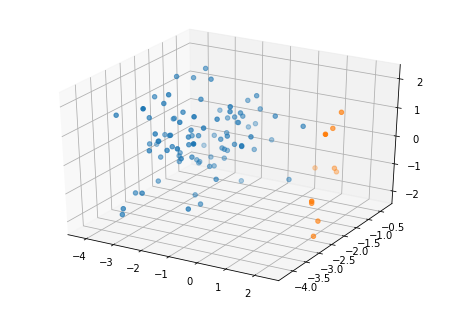

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

prefix = "./test/before"
tx = np.load(prefix+"tx.npy")
ty = np.load(prefix+"ty.npy")
tz = np.load(prefix+"tz.npy")
fx = np.load(prefix+"fx.npy")
fy = np.load(prefix+"fy.npy")
fz = np.load(prefix+"fz.npy")

fig=plt.figure()
ax = Axes3D(fig)

ax.scatter3D(tx, ty, tz)
ax.scatter3D(fx, fy, fz)

plt.show()


【使用Imblearn库后数据分布】

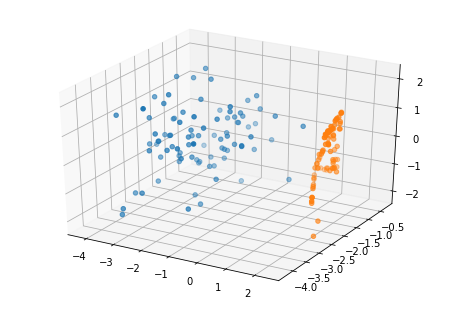

In [ ]:
prefix = "./test/after"
tx = np.load(prefix+"tx.npy")
ty = np.load(prefix+"ty.npy")
tz = np.load(prefix+"tz.npy")
fx = np.load(prefix+"fx.npy")
fy = np.load(prefix+"fy.npy")
fz = np.load(prefix+"fz.npy")

fig=plt.figure()
ax = Axes3D(fig)

ax.scatter3D(tx, ty, tz)
ax.scatter3D(fx, fy, fz)

plt.show()


# 四、用图片分类任务测试SMOTE效果
这次我们仍然使用前面项目用的“Caltech101的图像分类数据集”，抽取其中三类（0：ak47；1：binoculars；2：boom-box），我将部分0类（ak47）的样本放入了验证集，这样训练集数据的类别分布就非常不平衡，以演示SMOTE算法的效果。下面我们打印看下训练数据的分类标签：

In [8]:
import numpy as np
fileNames = np.loadtxt("/home/aistudio/work/Train_imba.txt", dtype=np.str)
print('训练集共有图片{}张，分类标签如下：'.format(fileNames.shape[0]))
labels = fileNames.T[1].astype('uint8')
print(labels)

训练集共有图片302张，分类分布如下：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]


观察打印结果发现：0类图片最少（30张），1类图片最多（192张），2类图片较少（80张）。这种数据类别的分布会导致分类模型对0类数据的特征学习得不充分，而导致欠拟合。

下面，我们使用Imblearn库生成新样本以改善训练数据数据的分布。处理训练集的代码写在了use_imblearn.py文件中（可打开文件查看处理代码，里面有详细的注释），我们在终端执行：

`python use_imblearn.py`

执行完成后我们打印下分布改善后训练集的标签：

训练集共有图片576张，分类标签如下：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 

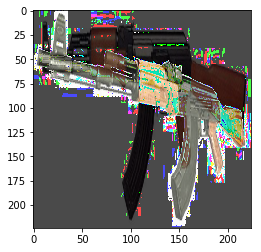

In [12]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Train_bal.txt是新生成的存储训练集标签的文件
fileNames = np.loadtxt("/home/aistudio/work/Train_bal.txt", dtype=np.str)
print('训练集共有图片{}张，分类标签如下：'.format(fileNames.shape[0]))
labels = fileNames.T[1].astype('uint8')
print(labels)

imgs = np.load("/home/aistudio/test/imgs.npy")

n = 420
print("查看第{}张图片：".format(n))
img = cv2.cvtColor(imgs[n], cv2.COLOR_BGR2RGB)
plt.imshow(img)


通过打印执行SMOTE后的训练集分类标签，我们发现：类别0生成了162张图片，类别2生成了112张图片，和原来的图片加载一起，每个类别都是192张图片，三个类别的图片一样多了。训练数据分配不平衡的问题得以解决。用Imblearn库生成新样本需要**注意**一个细节：图片数据是（w，h，c）格式的，算上图片数量是（n，w，h，c）格式。在输入Imblearn库的处理函数前要将其转换为1维数组，处理完成再转换回（n，w，h，c）格式。

# 五、测试SMOTE方法生成的数据对分类模型精度的提升
我们这次仍然使用前面项目介绍过的ResNet模型，简单数据增广、MixUp都用上，看看使用SMOTE方法改善训练数据分布不平衡的效果。


In [1]:
# 模型训练
from model import GoogLeNet
from train import train

if __name__ == '__main__':
    # 在分布不平衡的数据集上训练
    # model = GoogLeNet("GoogLeNet", num_classes=3)
    # train(model, augment='userDef') # 使用自定义数据増广的训练
    # model = GoogLeNet("GoogLeNet", num_classes=3)
    # train(model, augment='samplePairing') # 使用samplePairing
    model = GoogLeNet("GoogLeNet", num_classes=3)
    train(model, augment='mixup') # 使用mixup

    # 在分布平衡的数据集上训练
    # model = GoogLeNet("GoogLeNet", num_classes=3)
    # train(model, augment='userDef', bal='balance') # 使用自定义数据増广的训练
    # model = GoogLeNet("GoogLeNet", num_classes=3)
    # train(model, augment='samplePairing', bal='balance') # 使用samplePairing
    model = GoogLeNet("GoogLeNet", num_classes=3)
    train(model, augment='mixup', bal='balance') # 使用mixup


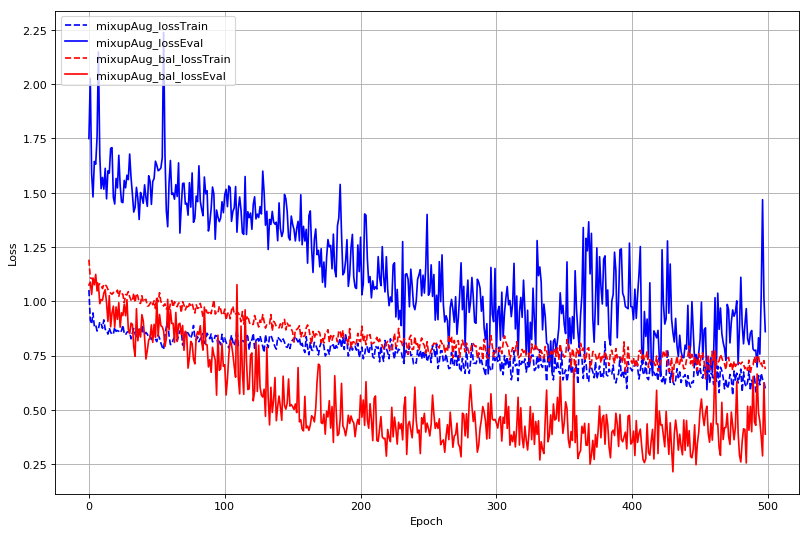

In [32]:
#查看训练结果(loss)
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
figurePath = "./logs/"
start = 400 # 查看最后100epoch
start = 0
end = -1
mixupAug_lossTrain = np.load(figurePath+"mixupAug_lossTrain.npy")[start:end]
mixupAug_lossEval = np.load(figurePath+"mixupAug_lossEval.npy")[start:end]
mixupAug_bal_lossTrain = np.load(figurePath+"mixupAug_bal_lossTrain.npy")[start:end]
mixupAug_bal_lossEval = np.load(figurePath+"mixupAug_bal_lossEval.npy")[start:end]
plt.figure(figsize=(12,8),dpi=80)
plt.plot(range(len(mixupAug_lossTrain)), mixupAug_lossTrain, 'b--', label='mixupAug_lossTrain')
plt.plot(range(len(mixupAug_lossEval)), mixupAug_lossEval, 'b', label='mixupAug_lossEval')
plt.plot(range(len(mixupAug_bal_lossTrain)), mixupAug_bal_lossTrain, 'r--', label='mixupAug_bal_lossTrain')
plt.plot(range(len(mixupAug_bal_lossEval)), mixupAug_bal_lossEval, 'r', label='mixupAug_bal_lossEval')
plt.legend(loc="upper left")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

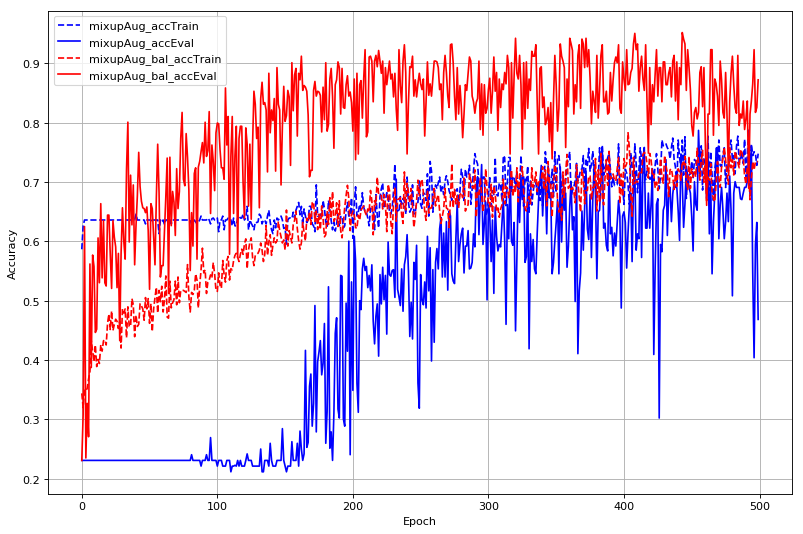

In [29]:
#查看训练结果(Accuracy)
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
figurePath = "./logs/"
start = 400 # 查看最后100epoch
start = 0
end = 500

mixupAug_accTrain = np.load(figurePath+"mixupAug_accTrain.npy")[start:end]
mixupAug_accEval = np.load(figurePath+"mixupAug_accEval.npy")[start:end]
mixupAug_bal_accTrain = np.load(figurePath+"mixupAug_bal_accTrain.npy")[start:end]
mixupAug_bal_accEval = np.load(figurePath+"mixupAug_bal_accEval.npy")[start:end]
plt.figure(figsize=(12,8),dpi=80)
plt.plot(range(len(mixupAug_accTrain)), mixupAug_accTrain, 'b--', label='mixupAug_accTrain')
plt.plot(range(len(mixupAug_accEval)), mixupAug_accEval, 'b', label='mixupAug_accEval')
plt.plot(range(len(mixupAug_bal_accTrain)), mixupAug_bal_accTrain, 'r--', label='mixupAug_bal_accTrain')
plt.plot(range(len(mixupAug_bal_accEval)), mixupAug_bal_accEval, 'r', label='mixupAug_bal_accEval')
plt.legend(loc="upper left")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

![](https://ai-studio-static-online.cdn.bcebos.com/39c57c91dce346cb97206868f2d2539ca5b028bf2b37467eae8545d0db691828)

从结果看，采用SMOTE方法插值生成新数据，确实改善了模型训练Loss曲线和分类精度曲线。训练500轮，验证集准曲率Top1从0.787涨到了0.952，有了大幅提高。

SMOTE的各种改进版本、ADASYN方法据说能够取得更好的效果，各位感兴趣的小伙伴可以尝试一下。


本人主要方向是深度学习技术在媒体、教育上的应用，欢迎深度学习赛道上的新老司机们关注交流。以后还会为大家分享更多有趣的项目。

【下面是我的主页链接】

来AI Studio互粉吧~等你哦~ [https://aistudio.baidu.com/aistudio/personalcenter/thirdview/76563](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/76563)

【项目列表】

[一文帮你理解用Paddle训练模型的原理1-手写回归模型 (https://aistudio.baidu.com/aistudio/projectdetail/367090)](https://aistudio.baidu.com/aistudio/projectdetail/367090)

[一文帮你理解用Paddle训练模型的原理2-权值可视化（VisualDL） (https://aistudio.baidu.com/aistudio/projectdetail/386954)](https://aistudio.baidu.com/aistudio/projectdetail/386954)

[训练数据太少？过拟合？一文带你领略“数据增长魔法”(上) (https://aistudio.baidu.com/aistudio/projectdetail/408059)](https://aistudio.baidu.com/aistudio/projectdetail/408059)

[训练数据太少？过拟合？一文带你领略“数据增长魔法”(下) (https://aistudio.baidu.com/aistudio/projectdetail/422256)](https://aistudio.baidu.com/aistudio/projectdetail/422256)

